In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df= pd.read_csv("https://raw.githubusercontent.com/ADPclass/ADP_book_ver01/main/data/hotel_bookings.csv")
df

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
0,0,No Deposit,105.0,2,5,NaN,0,0,1,0,131.50
1,0,No Deposit,303.0,2,2,NaN,0,0,0,0,73.95
2,0,No Deposit,33.0,2,3,0.0,0,0,0,0,NaN
3,0,No Deposit,48.0,0,1,0.0,0,0,1,0,80.30
4,0,No Deposit,216.0,4,7,0.0,0,0,2,0,60.90
...,...,...,...,...,...,...,...,...,...,...,...
19995,1,Non Refund,89.0,2,2,0.0,0,0,0,0,62.00
19996,1,Non Refund,101.0,0,3,0.0,0,0,0,0,130.00
19997,1,Non Refund,277.0,1,2,0.0,0,0,0,0,100.00
19998,1,No Deposit,0.0,0,1,0.0,0,0,0,0,209.00


# 머신러닝(50점)

## (1) 데이터를 탐색하고 탐색 결과를 제시하시오

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 11 columns):
is_canceled                       20000 non-null int64
deposit_type                      20000 non-null object
lead_time                         19995 non-null float64
stays_in_weekend_nights           20000 non-null int64
stays_in_week_nights              20000 non-null int64
is_repeated_guest                 19642 non-null float64
previous_cancellations            20000 non-null int64
previous_bookings_not_canceled    20000 non-null int64
booking_changes                   20000 non-null int64
days_in_waiting_list              20000 non-null int64
adr                               18937 non-null float64
dtypes: float64(3), int64(7), object(1)
memory usage: 1.7+ MB


- lead_time, is_repeated_guest, adr 컬럼에 결측치 존재
- deposit_type을 제외한 나머지 변수는 정수형

In [6]:
df.describe(include='all')

,is_canceled,deposit_type,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
count,20000.00000,20000,19995.000000,20000.000000,20000.000000,19642.000000,20000.000000,20000.000000,20000.000000,20000.000000,18937.000000
unique,NaN,3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,No Deposit,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,19138,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.12000,NaN,85.978345,0.892550,2.380400,0.038133,0.032900,0.169050,0.269400,1.983950,101.410239
std,0.32497,NaN,96.427240,0.952077,1.777345,0.191521,0.455552,1.502426,0.687566,15.927212,49.245097
min,0.00000,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-6.380000
25%,0.00000,NaN,11.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,68.800000
50%,0.00000,NaN,51.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,94.500000
75%,0.00000,NaN,132.000000,2.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,126.000000


In [20]:
df['is_canceled'].value_counts(normalize=True)

0    0.88
1    0.12
Name: is_canceled, dtype: float64

종속변수는 이진분류형이며, 비율이 88:12로 뷸균형이다

In [35]:
df.groupby('is_canceled').apply(lambda x:x.mean())

,is_canceled,lead_time,stays_in_weekend_nights,stays_in_week_nights,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,days_in_waiting_list,adr
is_canceled,,,,,,,,,,
0,0.0,78.420290,0.888750,2.361080,0.041481,0.013068,0.189886,0.293409,1.737443,101.034845
1,1.0,141.388333,0.920417,2.522083,0.013577,0.178333,0.016250,0.093333,3.791667,104.162354


종속변수에 따라 leatime 값이 2배 이상 차이남

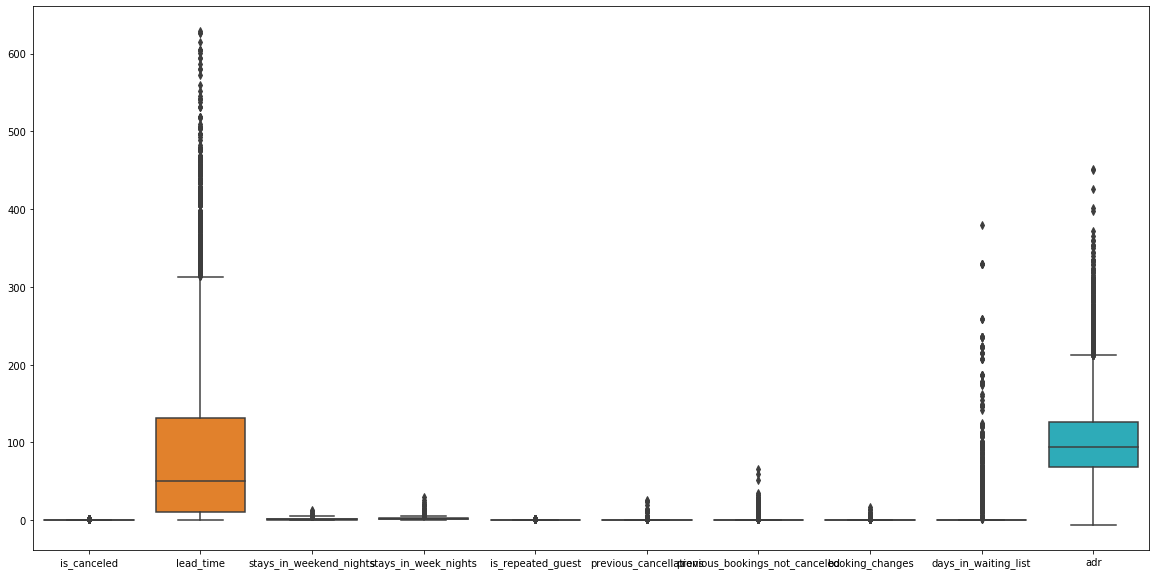

In [38]:
plt.figure(figsize=(20,10))
sns.boxplot(data=df)

이상치가 존재하는 변수들이 많음

## (2) 결측치를 탐색하고 대체 방법 및 근거를 제시하시오.

In [44]:
df.isna().sum()

is_canceled                          0
deposit_type                         0
lead_time                            5
stays_in_weekend_nights              0
stays_in_week_nights                 0
is_repeated_guest                  358
previous_cancellations               0
previous_bookings_not_canceled       0
booking_changes                      0
days_in_waiting_list                 0
adr                               1063
dtype: int64

결측치를 가진 독립변수는 lead_time / is_repeated_guest / adr

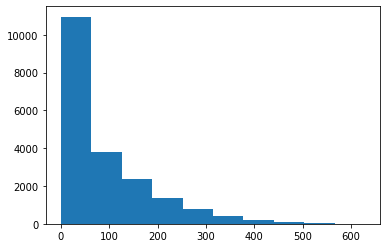

In [46]:
plt.hist('lead_time',bins=10,range=(df['lead_time'].min(),df['lead_time'].max()),data=df)
plt.show()

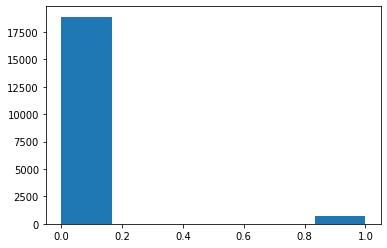

In [29]:
plt.hist('is_repeated_guest',bins=6,range=(df['is_repeated_guest'].min(),df['is_repeated_guest'].max()),data=df)
plt.show()

In [30]:
df['is_repeated_guest'].value_counts()

0.0    18893
1.0      749
Name: is_repeated_guest, dtype: int64

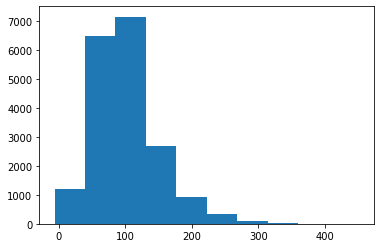

In [47]:
plt.hist('adr',bins=10,range=(df['adr'].min(),df['adr'].max()),data=df)
plt.show()

결측치 제거 방법

- lead_time의 경우 5개밖에 없기 때문에 행 제거진행
- is_repeated_guest의 경우 이진범주형 변수이기 떄문에 최빈값으로 대치
- adr의 경우 정규분포의 모양을 띄는 수치형 변수이므로 평균으로 대치

In [52]:
df = df.dropna(subset=['lead_time'])
df.shape

(19995, 11)

5개 제거 확인 (20000 -> 19995)

In [53]:
df['is_repeated_guest'] =df['is_repeated_guest'].fillna(df['is_repeated_guest'].mode()[0])


In [54]:
df['adr'] = df['adr'].fillna(df['adr'].mean())

In [55]:
df.isna().sum()

is_canceled                       0
deposit_type                      0
lead_time                         0
stays_in_weekend_nights           0
stays_in_week_nights              0
is_repeated_guest                 0
previous_cancellations            0
previous_bookings_not_canceled    0
booking_changes                   0
days_in_waiting_list              0
adr                               0
dtype: int64

결측치 제거 확인

## (3) 데이터 질을 향상시킬 수 있는 방법을 제안하시오

1. boxplot으로 그려보았을 때 이상치로 보이는 데이터들이 꽤 있었다. 해당 데이터들을 제거함으로써 데이터 질을 향상시킬 수 있다

2. 로지스틱 회귀분석 또는 SVM을 이용해 종속변수를 예측하려고 하는 경우, 변수 Scaling을 적용하여 데이터 질을 향상시킬 수 있다

3. 종속변수가 뷸균형한 상태이기 때문에 샘플링기법을 이용해 뷸균형을 맞춰준다

## (4) 데이터 뷸균형을 시각화하여 식별하고 뷸균형 판단근거를 작성하시오

In [60]:
value_count = df['is_canceled'].value_counts()

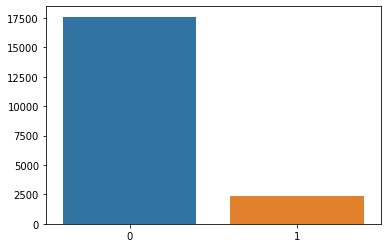

In [61]:
sns.barplot(value_count.index, value_count.values)

In [62]:
value_count

0    17595
1     2400
Name: is_canceled, dtype: int64

그래프 및 Out[59] 에서 알 수 있듯이, 종속변수 값인 0과 1의 비율이 약 88:12로 뷸균형을 띄고있다

## (5) 오버 샘플링 기법을 설명하고 비교한 뒤 2개 기법을 선정하고 근거를 제시하시오

오버 샘플링은 빈도가 상대적으로 적은 클래스 데이터를 더 생성하여 불균형을 해소하는 방법이다. 소수 클래스의 샘플을 합성하거나 복제하여 소수 클래스의 데이터 특성이 드러나게 함으로써 정보의 보존효과를 얻을 수 있다는 장점이 있다. 하지만 소수 클래스의 샘플을 과도하게 증가시켰을 때 과적합을 유발시킬 수 있으며, 샘플이 증가함에 따라 학습시 계산 비용이 증가한다는 단점이 있다.

1. Random Oversampling

 - 소수 데이터를 무작위로 선택해 복사하는 방법

 - 쉽고 빠르다는 장점이 있지만, 기존의 데이터를 그대로 사용하는 것이기 때문에 과적합이 일어날 수 있음. 



2. SMOTE

 - 학습 데이터의 minority class의 정보를 활용해서 KNN기반으로 새로운 데이터 샘플을 생성하는 방법. 

[동작 방식]  
1.임의로 minority class 샘플 하나를 선택한다. 

2. minority class 중에서 해당 관측치와 유사도가 가장 큰 관측치 K 개를 선택한다. 

3. 관측치들 간의 직선의 거리(difference)를 계산한다. 

4. 랜덤하게 선택된 0~1 사이의 값을 곱한다 

5. 이를 이용해서 직선 위에서 새로운 data point를 생성한다. 


* Random OverSampling에 비해서 추가적인 계산이 필요해 시간이 좀 더 소요되지만 과적합을 피해 좀 더 좋은 일반화 성능을 낼 수 있음

## (6) 기법을 선정한 이유를 작성하고, 원데이터를 포함해 3개의 데이터 세트를 구성하시오

각 방법이 각각의 장점을 가지고 있어 선정함

In [66]:
from imblearn.over_sampling import RandomOverSampler, SMOTE

In [86]:
X = df.drop(columns=['is_canceled'])
Y = df['is_canceled']

X = pd.get_dummies(X)
X.shape, Y.shape

((19995, 12), (19995,))

In [87]:
## Random OverSampling 데이터셋

ros_x, ros_y = RandomOverSampler(random_state=2024).fit_resample(X,Y)
ros_x.shape, ros_y.shape

((35190, 12), (35190,))

In [88]:
pd.Series(ros_y).value_counts()

1    17595
0    17595
dtype: int64

In [89]:
## SMOTE 데이터셋

smote_x, smote_y = SMOTE(random_state=2024).fit_resample(X,Y)
smote_x.shape, smote_y.shape

((35190, 12), (35190,))

In [90]:
pd.Series(smote_y).value_counts()

1    17595
0    17595
dtype: int64

## (7) 오버샘플링 데이터와 원데이터를 사용해 정확도 측면 모델 하나와 속도 측면의 모델 하나를 선정하고 그 이유를 설명하시오

In [91]:
from sklearn.metrics import accuracy_score, roc_auc_score, f1_score

In [92]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split

In [93]:
##수행속도 측정을 위함

import time

In [94]:
X_list = [X,ros_x, smote_x]
Y_list = [Y, ros_y, smote_y]
Model_list = ['Original', 'Random OverSampling','SMOTE']


In [101]:
accuracy_score_list = []
f1_score_list = []
roc_auc_score_list = []
duration_list = []

for i in range(0,3):
    ts = time.time()
    x_train, x_test, y_train, y_test = train_test_split(X_list[i], Y_list[i], test_size=0.2, random_state=2024)
    clf = DecisionTreeClassifier(random_state=2024).fit(x_train, y_train)
    te = time.time()
    print(Model_list[i])
    print(accuracy_score(y_test, clf.predict(x_test)))
    accuracy_score_list.append(accuracy_score(y_test, clf.predict(x_test)))
    f1_score_list.append(f1_score(y_test, clf.predict(x_test)))
    roc_auc_score_list.append(roc_auc_score(y_test, clf.predict(x_test)))
    duration = te - ts
    print(duration)
    duration_list.append(duration)

Original
0.8672168042010503
0.16538000106811523
Random OverSampling
0.9475703324808185
0.2767448425292969
SMOTE
0.9231315714691674
0.3052079677581787


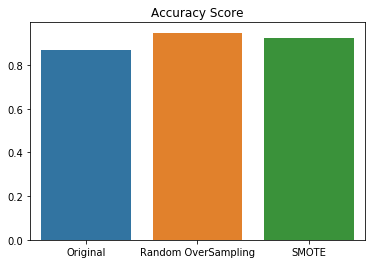

In [112]:
plt.title("Accuracy Score")
sns.barplot(Model_list, accuracy_score_list)
plt.show()

In [114]:
accuracy_score_list

[0.8672168042010503, 0.9475703324808185, 0.9231315714691674]

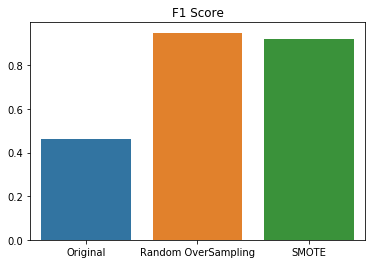

In [113]:
plt.title("F1 Score")
sns.barplot(Model_list, f1_score_list)
plt.show()

In [115]:
f1_score_list

[0.4620060790273556, 0.9498164014687883, 0.9229234933751248]

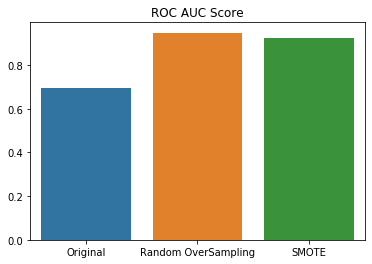

In [116]:
plt.title("ROC AUC Score")
sns.barplot(Model_list, roc_auc_score_list)
plt.show()

In [117]:
roc_auc_score_list

[0.6946672958942898, 0.9475960759267459, 0.9231303353363712]

정확도 측정결과, Randome OverSampling > SMOTE > Original 순으로 좋았다

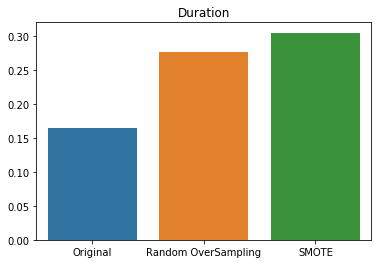

In [118]:
plt.title("Duration")
sns.barplot(Model_list, duration_list)
plt.show()

In [119]:
duration_list

[0.16538000106811523, 0.2767448425292969, 0.3052079677581787]

속도 측정결과, Original -> Random OverSampling -> SMOTE 순으로 빨랐다

결과적으로, 속도와 정확도 모두 Randome OverSampling이 SMOTE보다 더 좋은 성능을 보였다

## (8) 원데이터와 오버 샘플링 데이터를 가지고 각각 분류한 결과를 바탕으로, 오버 샘플링이 성능에 미친 영향에 대해 작성하시오

(7)의 수행결과를 보면 원본데이터 대비 오버샘플링을 사용한 두 모델이 정확도, F1 SCORE, AUC_ROC_SCORE 등 모든 분류모델 평가지표에서 매우 우수한 성능을 보였다. 이는 오버샘플링을 사용했을 떄 더 좋은 모델을 만들수 있다는 것을 의미한다.


특히, fraud detection, 질병 예측, 신용불량자 예측, 기기 고장 예측, spam detection 같은  use case에서는 minority class를 정확하게 예측하는 것이 더 중요하다. 하지만 대부분의 데이터에는 majority class의 샘플이 훨씬 많다. 